In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside = pd.read_csv('outsidedata.csv',skiprows=0)
inside = pd.read_csv('insidedata.csv',skiprows=0)

display(outside)
display(inside)

,time,PM1,PM2.5,PM10,BM680 Temp,BM680 Gas,BM680 Humidity,BM680 Pressure,BM680 Altitude
0,2 / 21 / 2025,0,1,1,33.391914,97268,100.000000,766.566308,2292.229678
1,2 / 21 / 2025,0,1,1,23.127266,14678,36.970113,1009.282017,33.088675
2,2 / 21 / 2025,0,1,1,23.161445,22550,36.477029,1009.282718,33.082814
3,2 / 21 / 2025,0,1,1,23.187422,33798,35.914106,1009.286989,33.047143
4,2 / 21 / 2025,0,1,1,23.206758,43284,35.381869,1009.293627,32.991700
...,...,...,...,...,...,...,...,...,...
295,2 / 21 / 2025,2,2,2,19.780391,301636,34.507801,1009.283918,33.072798
296,2 / 21 / 2025,2,2,2,19.775312,301111,34.489958,1009.281351,33.094237
297,2 / 21 / 2025,2,3,3,19.771602,301373,34.483827,1009.282772,33.082363
298,2 / 21 / 2025,2,3,3,19.768086,300069,34.471922,1009.275383,33.144084


,time,PM1,PM2.5,PM10,BM680 Temp,BM680 Gas,BM680 Humidity,BM680 Pressure,BM680 Altitude
0,2 / 21 / 2025,1,1,1,33.391914,38724,100.000000,766.566308,2292.229678
1,2 / 21 / 2025,0,0,0,24.136250,10703,36.792288,1010.270393,24.836849
2,2 / 21 / 2025,0,0,0,24.071797,16223,36.708903,1010.280842,24.749647
3,2 / 21 / 2025,0,0,0,24.031562,21225,36.598417,1010.283537,24.727156
4,2 / 21 / 2025,0,0,0,24.008711,27159,36.460202,1010.297098,24.613987
...,...,...,...,...,...,...,...,...,...
295,2 / 21 / 2025,0,1,1,24.185273,214065,34.358803,1010.290711,24.667284
296,2 / 21 / 2025,0,1,1,24.186250,212620,34.370553,1010.301434,24.577802
297,2 / 21 / 2025,0,1,1,24.186836,213012,34.370608,1010.296847,24.616080
298,2 / 21 / 2025,1,2,2,24.187812,212099,34.370701,1010.303896,24.557254


# Other Teams Data - Step 2 Onwards

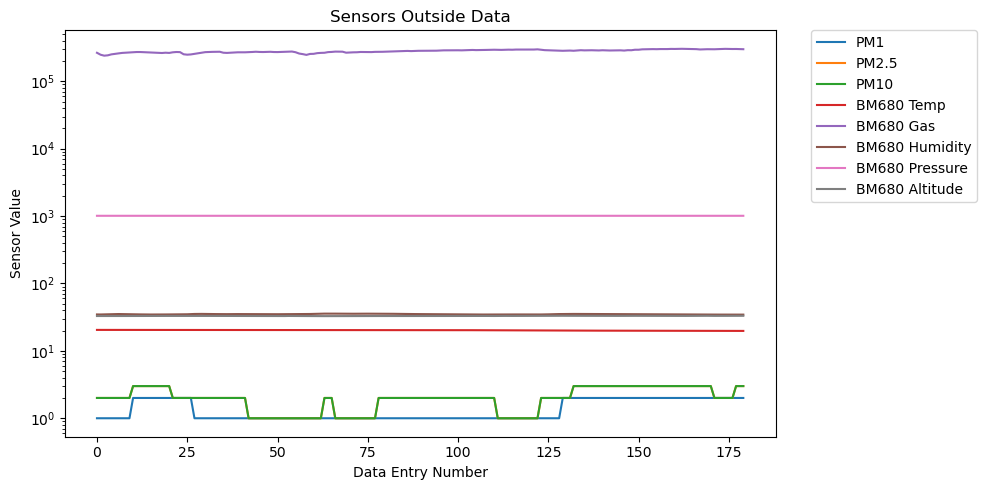

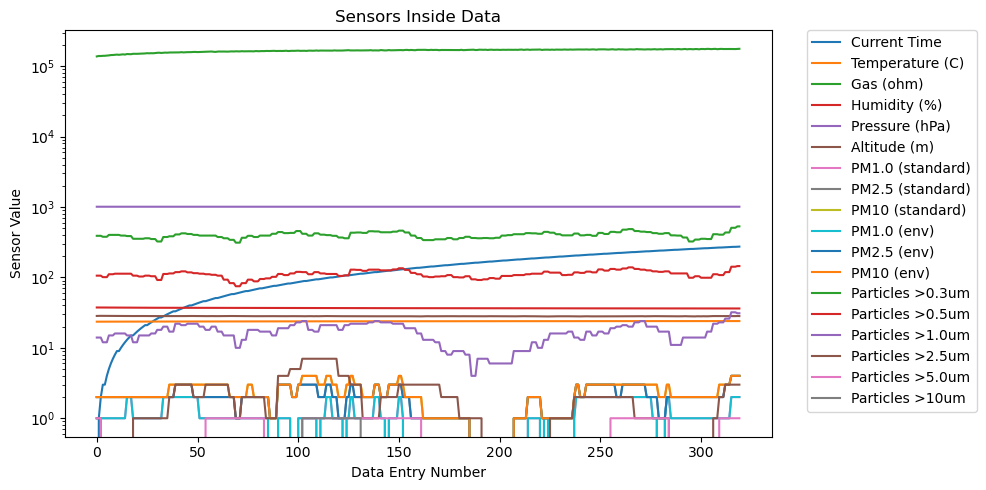

In [14]:
def plot_time_series(df, title):
    df = df.iloc[30:] 
    plt.figure(figsize=(10, 5))
    
    for col in df.columns:
        if col.lower() != 'time':
            plt.plot(range(len(df)), df[col], label=col) 

    plt.xlabel('Data Entry Number')
    plt.ylabel('Sensor Value')
    plt.yscale('log')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

plot_time_series(outside, 'Outside Data')
plot_time_series(inside, 'Inside Data')

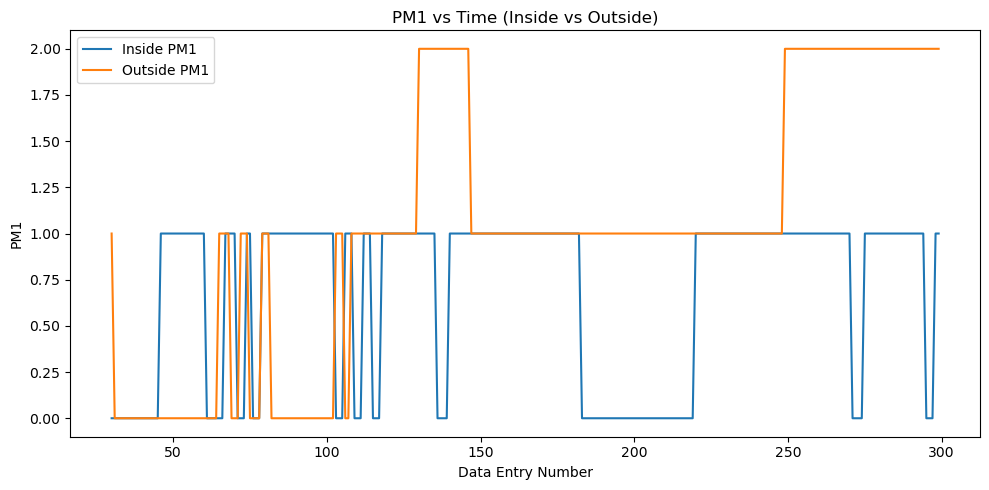

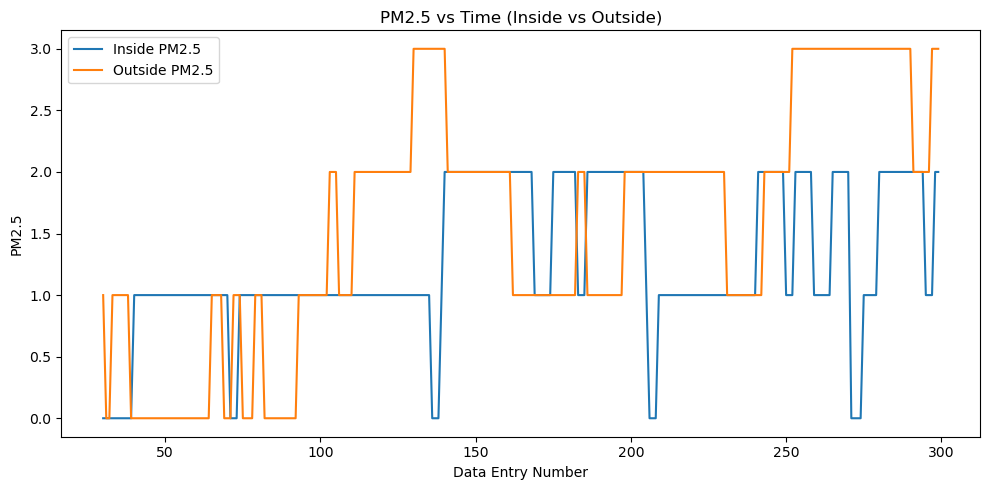

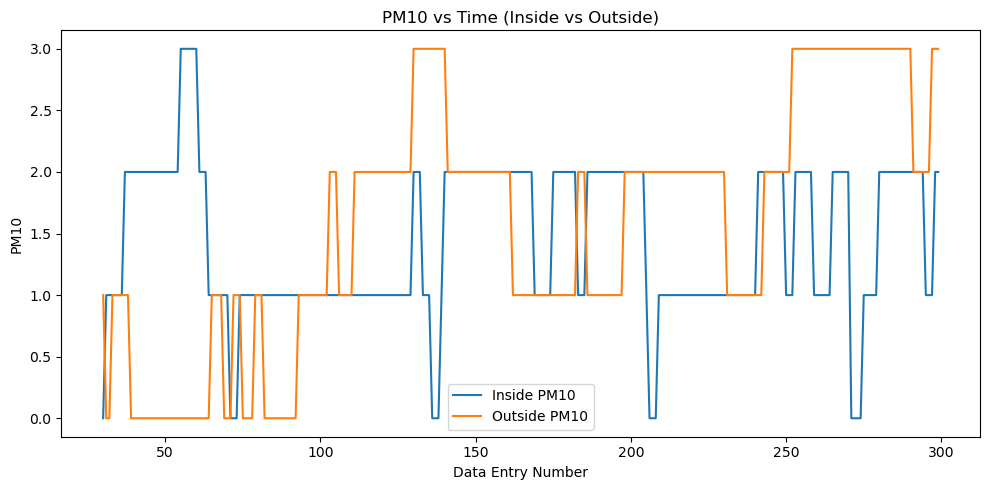

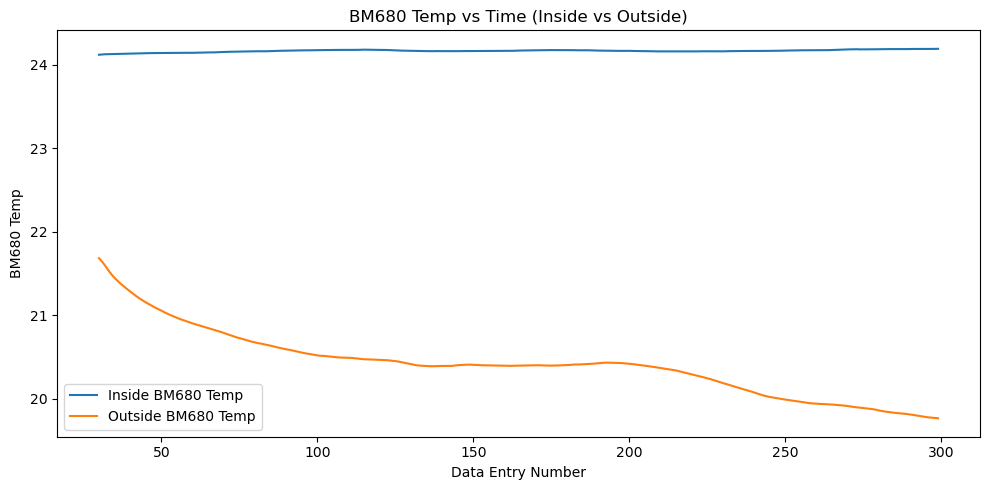

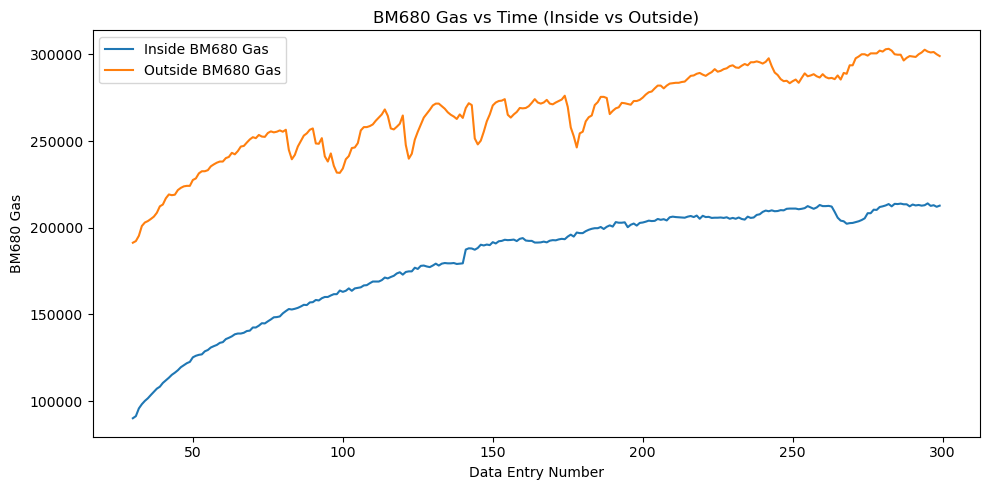

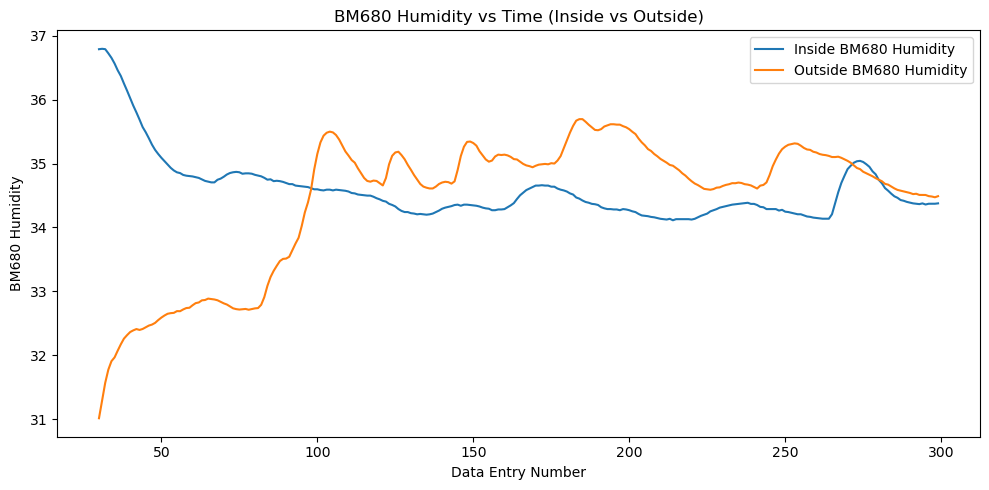

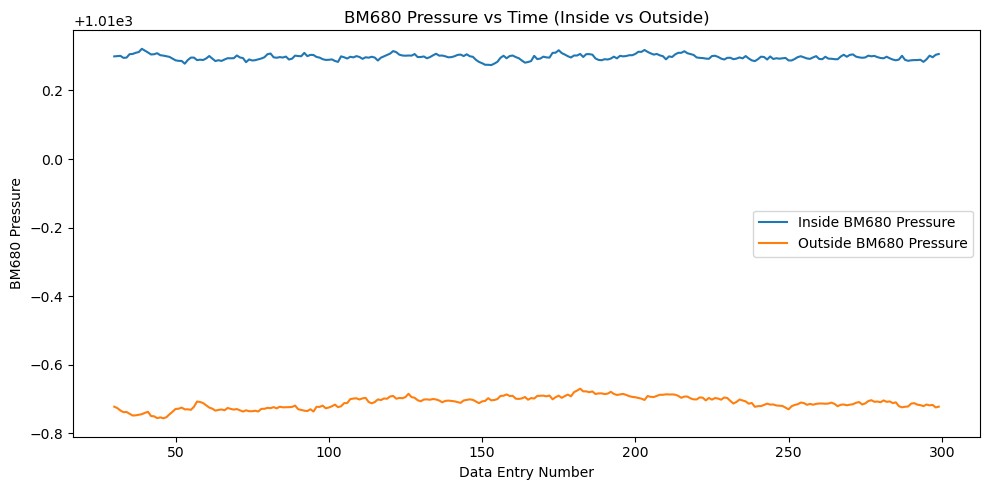

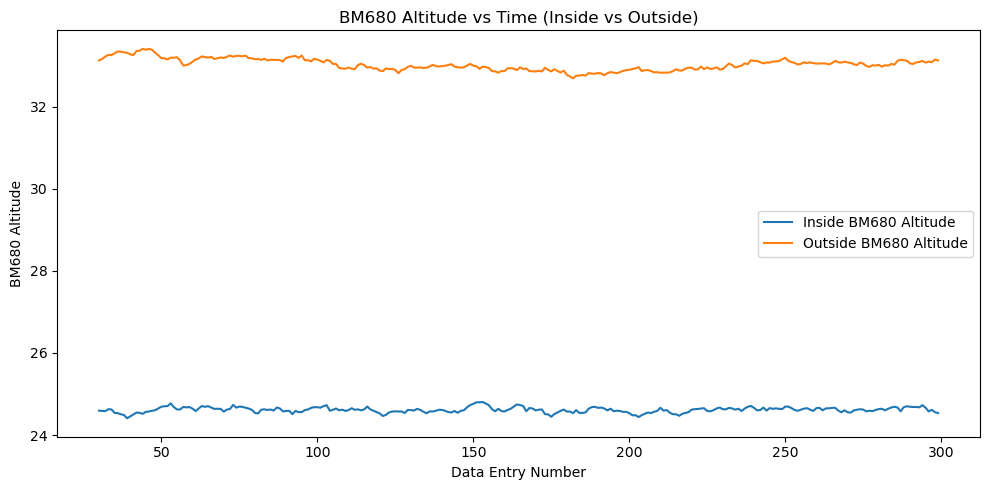

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

inside = inside.iloc[30:]
outside = outside.iloc[30:]

sensor_columns = [col for col in inside.columns if col != inside.columns[0]]

start_index = 30

for sensor in sensor_columns:
    plt.figure(figsize=(10, 5))
    
    plt.plot(range(start_index, len(inside) + start_index), inside[sensor], label=f'Inside {sensor}')
    plt.plot(range(start_index, len(outside) + start_index), outside[sensor], label=f'Outside {sensor}')
    
    plt.xlabel('Data Entry Number')
    plt.ylabel(sensor)
    plt.title(f'{sensor} vs Time (Inside vs Outside)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


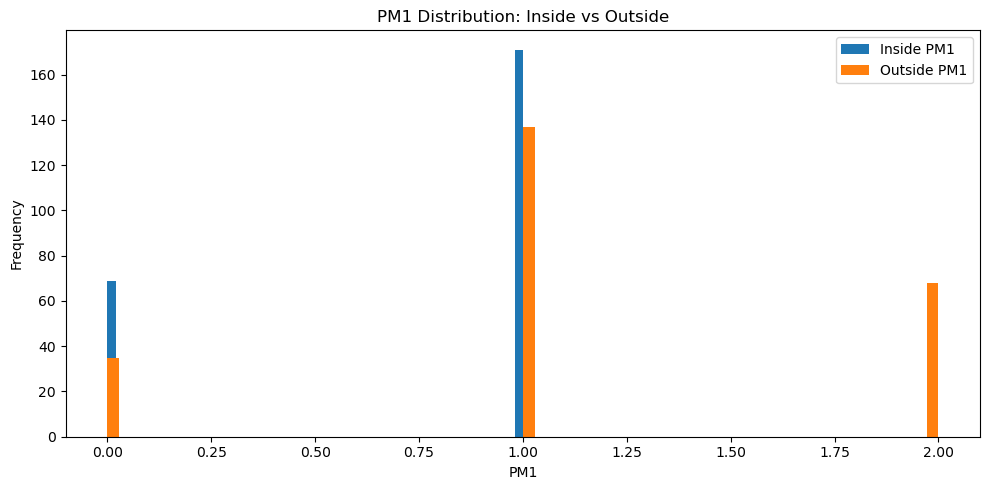

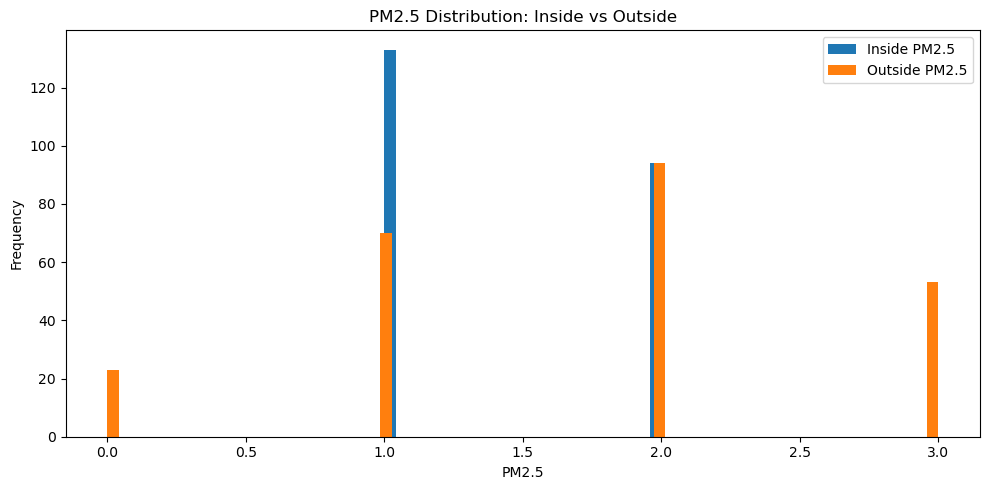

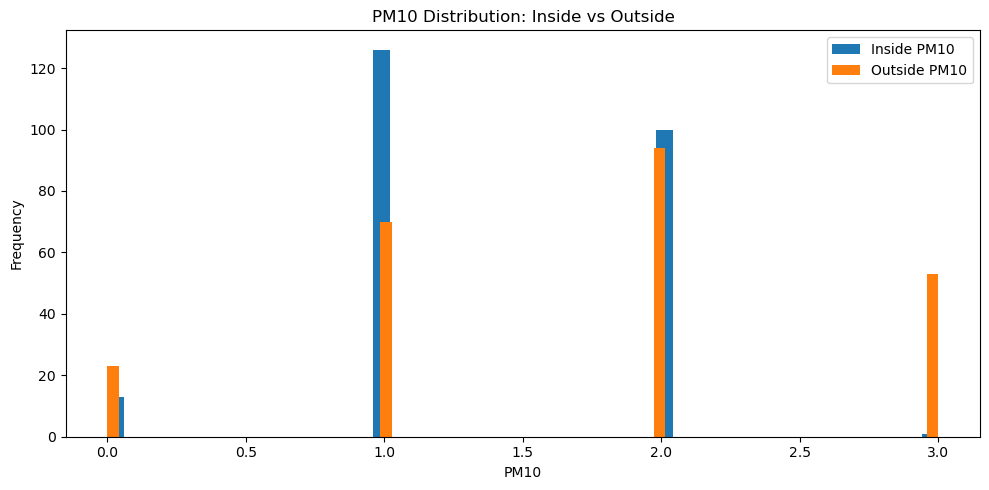

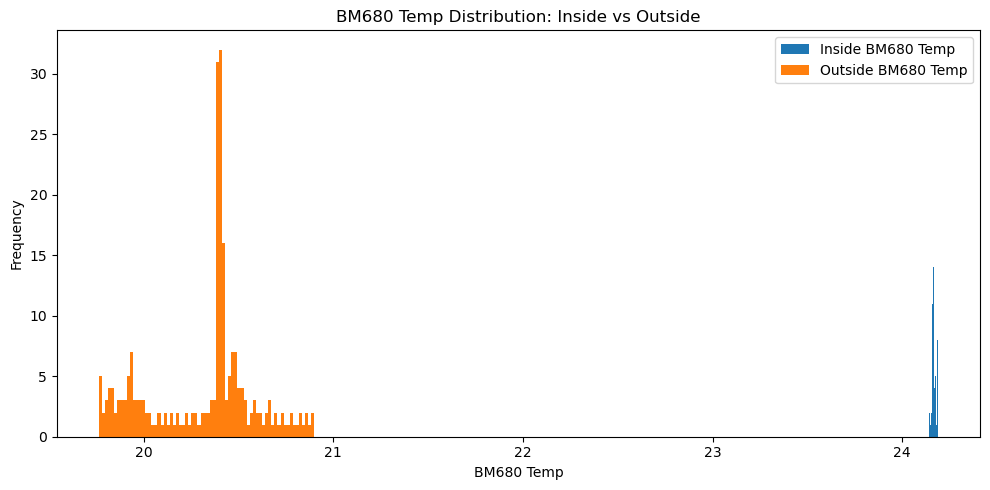

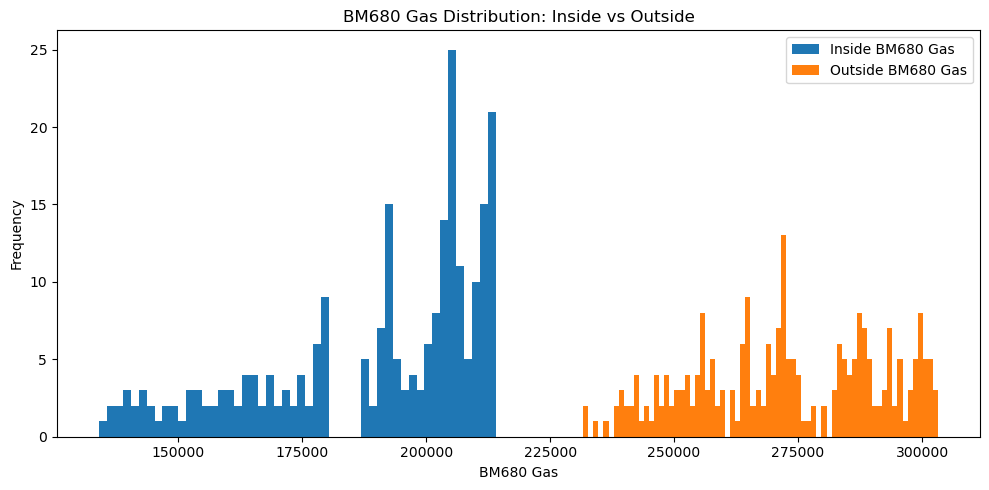

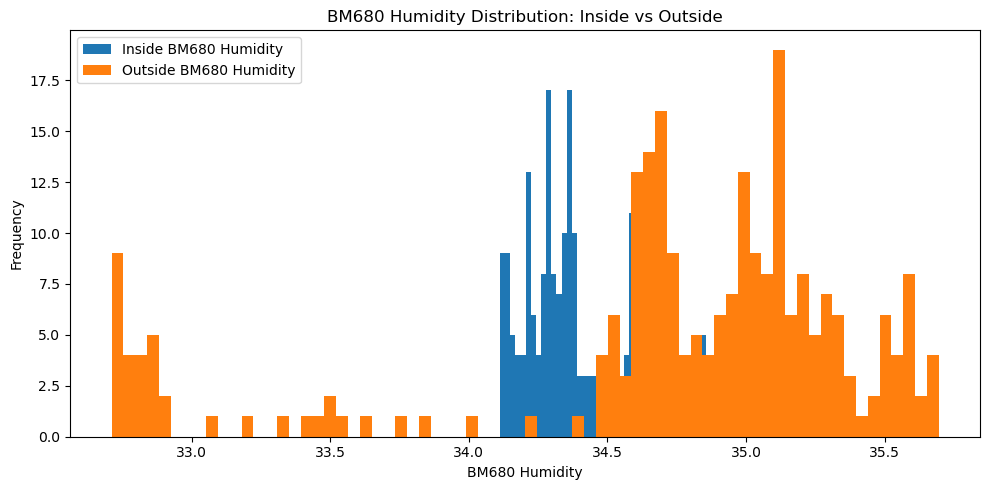

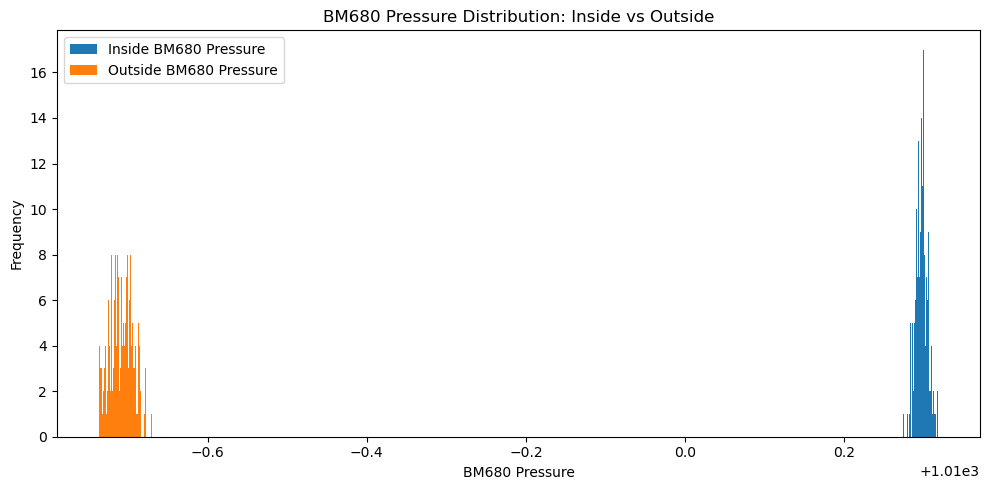

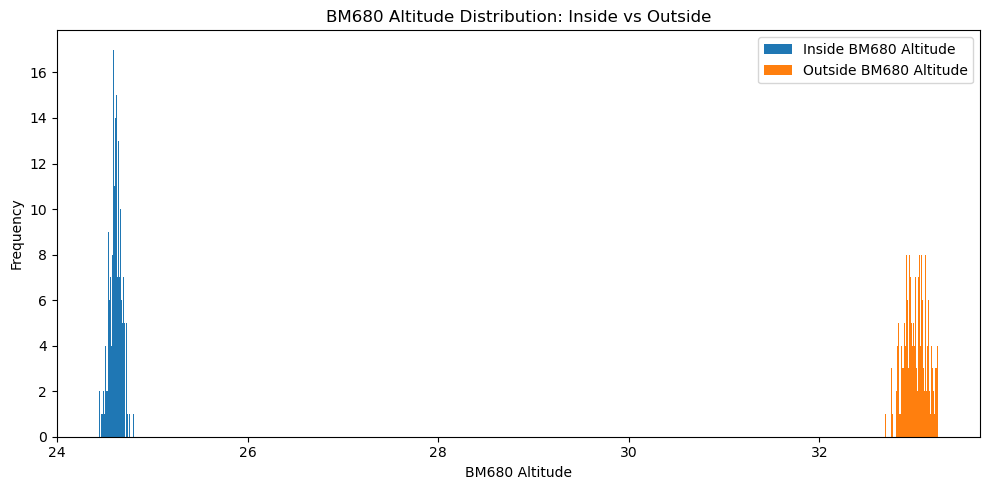

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

inside = inside.iloc[30:]
outside = outside.iloc[30:]

sensor_columns = [col for col in inside.columns if col != inside.columns[0]]

for sensor in sensor_columns:
    inside_data = inside[sensor].dropna()
    outside_data = outside[sensor].dropna()

    plt.figure(figsize=(10, 5))
    plt.hist(inside_data, bins=50, label=f'Inside {sensor}')
    plt.hist(outside_data, bins=70, label=f'Outside {sensor}')
    plt.xlabel(sensor)
    plt.ylabel('Frequency')
    plt.title(f'{sensor} Distribution: Inside vs Outside')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [5]:
inside = inside.iloc[30:]
outside = outside.iloc[30:]

sensor_columns = [col for col in inside.columns if col != inside.columns[0]]  # Exclude the first column

for sensor in sensor_columns:
    inside_data = inside[sensor].dropna()
    outside_data = outside[sensor].dropna()

    mu_in = np.mean(inside_data)
    mu_out = np.mean(outside_data)
    
    sigma_in = np.std(inside_data, ddof=1)
    sigma_out = np.std(outside_data, ddof=1)
    
    n_in = len(inside_data)
    n_out = len(outside_data)
    
    SEM_in = sigma_in / np.sqrt(n_in)
    SEM_out = sigma_out / np.sqrt(n_out)
    
    SE_delta = np.sqrt(SEM_in**2 + SEM_out**2)
    
    delta = abs(mu_in - mu_out)
    
    num_standard_devs = delta / SE_delta
    
    print(f"Sensor: {sensor}")
    print(f"Inside Mean: {mu_in:.2f}, Inside Std Dev: {sigma_in:.2f}, SEM: {SEM_in:.2f}")
    print(f"Outside Mean: {mu_out:.2f}, Outside Std Dev: {sigma_out:.2f}, SEM: {SEM_out:.2f}")
    print(f"Difference in Means: {delta:.2f}, Combined Standard Error: {SE_delta:.2f}")
    print(f"Number of Standard Deviations between Means: {num_standard_devs:.2f}")
    
    if num_standard_devs > 3:
        print(f"For sensor {sensor}, the means are separated by more than 3σ; statistically significant difference.")
    else:
        print(f"For sensor {sensor}, the means are not separated by more than 3σ; no significant difference.")
    print("\n")


Sensor: PM1
Inside Mean: 0.73, Inside Std Dev: 0.45, SEM: 0.03
Outside Mean: 1.25, Outside Std Dev: 0.58, SEM: 0.04
Difference in Means: 0.52, Combined Standard Error: 0.05
Number of Standard Deviations between Means: 10.41
For sensor PM1, the means are separated by more than 3σ; statistically significant difference.


Sensor: PM2.5
Inside Mean: 1.40, Inside Std Dev: 0.58, SEM: 0.04
Outside Mean: 1.94, Outside Std Dev: 0.77, SEM: 0.05
Difference in Means: 0.54, Combined Standard Error: 0.07
Number of Standard Deviations between Means: 8.08
For sensor PM2.5, the means are separated by more than 3σ; statistically significant difference.


Sensor: PM10
Inside Mean: 1.41, Inside Std Dev: 0.58, SEM: 0.04
Outside Mean: 1.94, Outside Std Dev: 0.77, SEM: 0.05
Difference in Means: 0.52, Combined Standard Error: 0.07
Number of Standard Deviations between Means: 7.86
For sensor PM10, the means are separated by more than 3σ; statistically significant difference.


Sensor: BM680 Temp
Inside Mean: 2

Almost all the distribution graphs look to be well described as a gaussian distribution, except fot the gas distribiutions on the inside and the humidity distribution on the outside. 

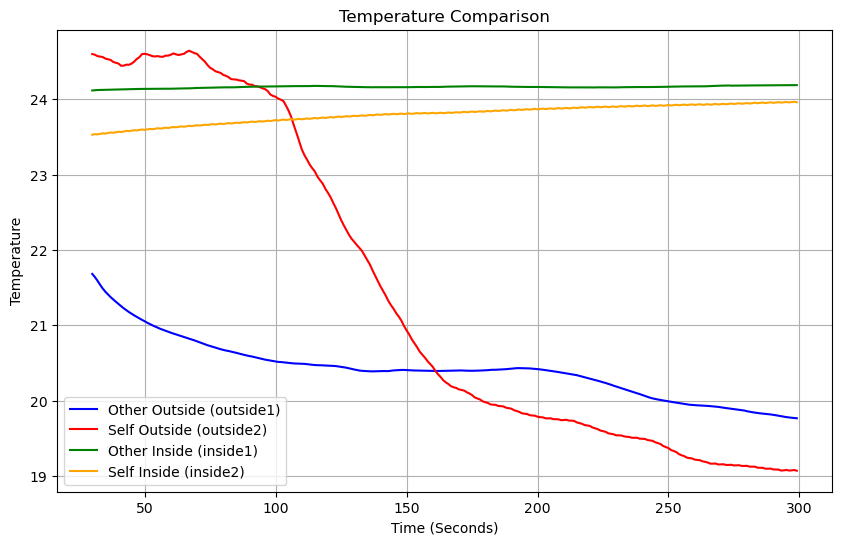

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)
outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))  
data_outside1 = outside1.iloc[30:, 4] 

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 1]  

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))
data_inside1 = inside1.iloc[30:, 4]  

time_inside2 = np.arange(30, len(inside2))
data_inside2 = inside2.iloc[30:, 1] 
inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1] 
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')

plt.legend()
plt.grid(True)

plt.show()


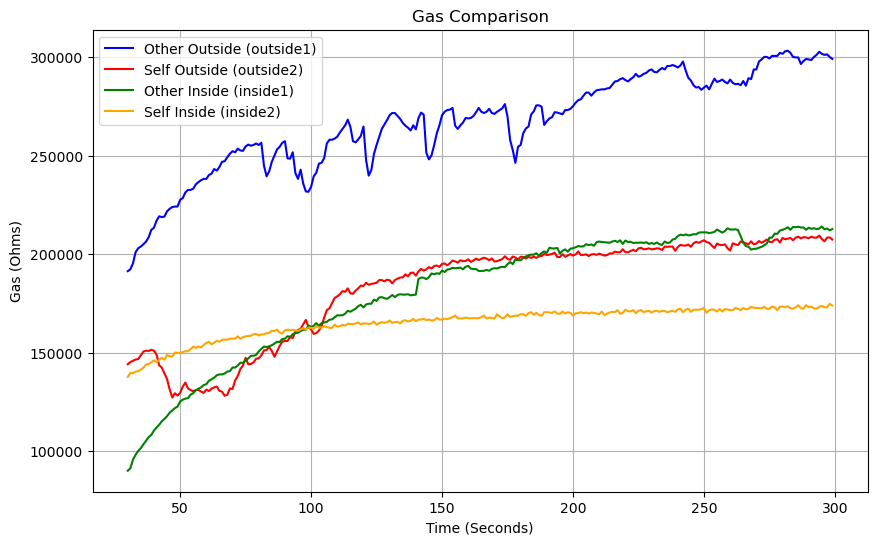

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))
data_outside1 = outside1.iloc[30:, 5]  
time_outside2 = np.arange(30, len(outside2))  
data_outside2 = outside2.iloc[30:, 2] 
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))
data_inside1 = inside1.iloc[30:, 5]  

time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 2]  
inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside)) 
data_inside = inside.iloc[30:, 1]  

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Gas (Ohms)')
plt.title('Gas Comparison')

plt.legend()
plt.grid(True)

plt.show()


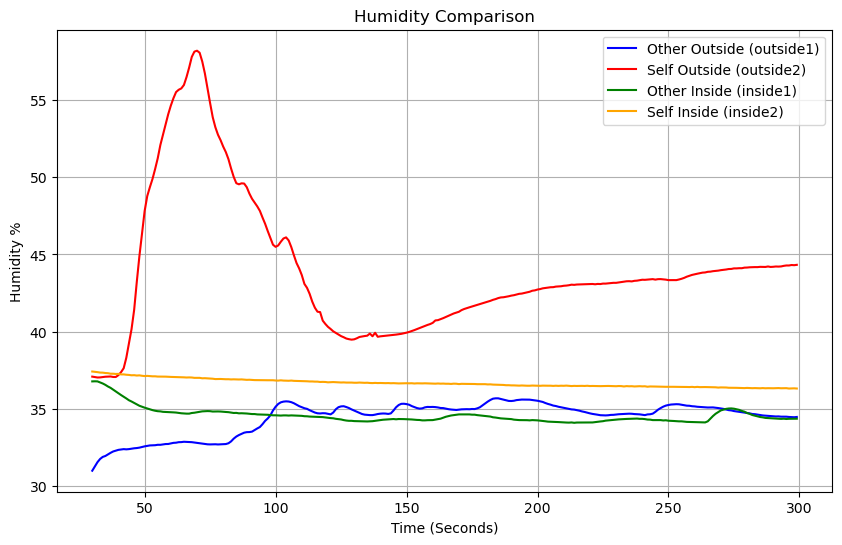

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 6] 
time_outside2 = np.arange(30, len(outside2))
data_outside2 = outside2.iloc[30:, 3]

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 6] 
time_inside2 = np.arange(30, len(inside2)) 
data_inside2 = inside2.iloc[30:, 3]

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1] 

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Humidity %')
plt.title('Humidity Comparison')

plt.legend()
plt.grid(True)

plt.show()


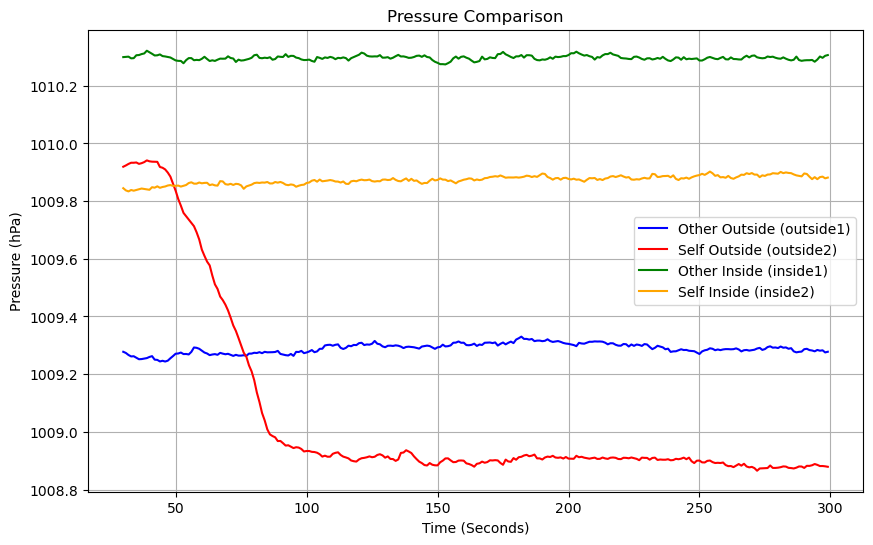

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 7] 

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 4]  

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 7] 

time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 4]  

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside)) 
data_inside = inside.iloc[30:, 1]

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure Comparison')

plt.legend()
plt.grid(True)

plt.show()


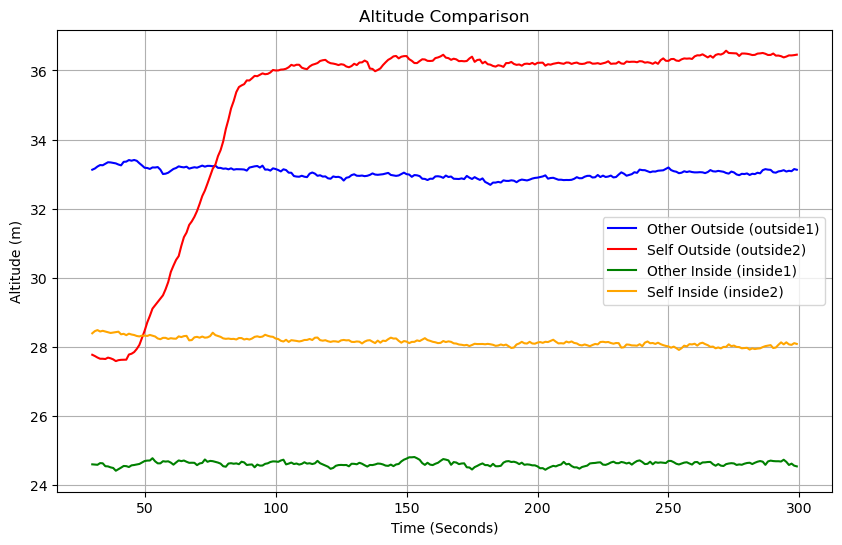

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 8]

time_outside2 = np.arange(30, len(outside2))
data_outside2 = outside2.iloc[30:, 5]  
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)


time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 8]  
time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 5] 

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside)) 
data_inside = inside.iloc[30:, 1] 
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Altitude (m)')
plt.title('Altitude Comparison')

plt.legend()
plt.grid(True)

plt.show()


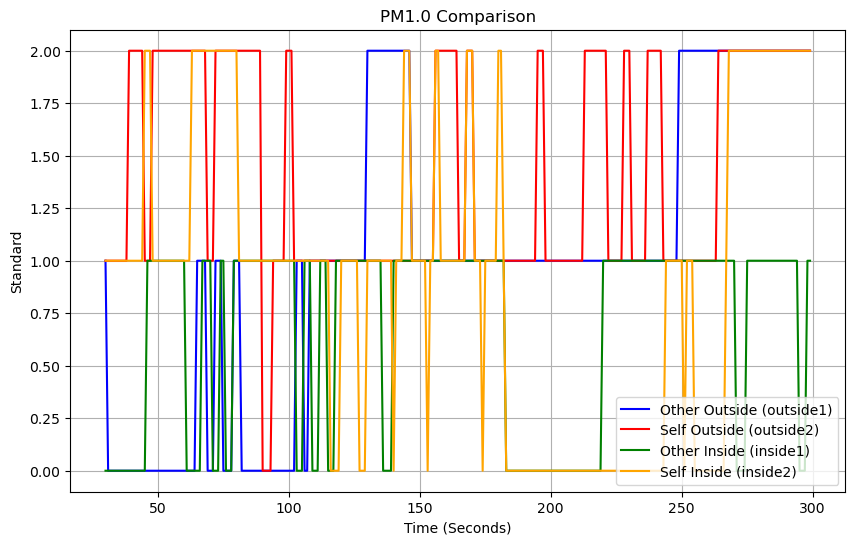

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1)) 
data_outside1 = outside1.iloc[30:, 1]  

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 6]
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 1]
time_inside2 = np.arange(30, len(inside2)) 
data_inside2 = inside2.iloc[30:, 6]  

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1]  
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Standard')
plt.title('PM1.0 Comparison')

plt.legend()
plt.grid(True)

plt.show()


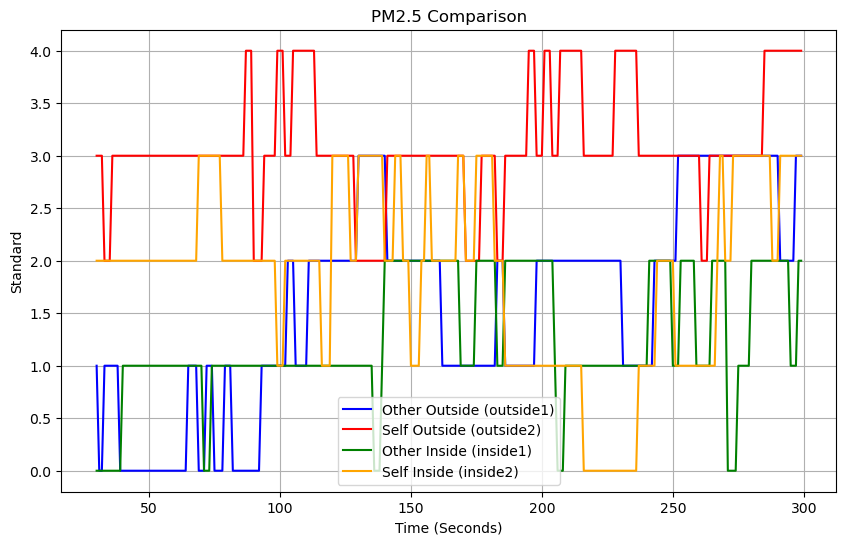

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))
data_outside1 = outside1.iloc[30:, 2] 

time_outside2 = np.arange(30, len(outside2)) 
data_outside2 = outside2.iloc[30:, 7]  

inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)


time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 2] 

time_inside2 = np.arange(30, len(inside2)) 
data_inside2 = inside2.iloc[30:, 7] 
inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1]
min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Standard')
plt.title('PM2.5 Comparison')

plt.legend()
plt.grid(True)

plt.show()


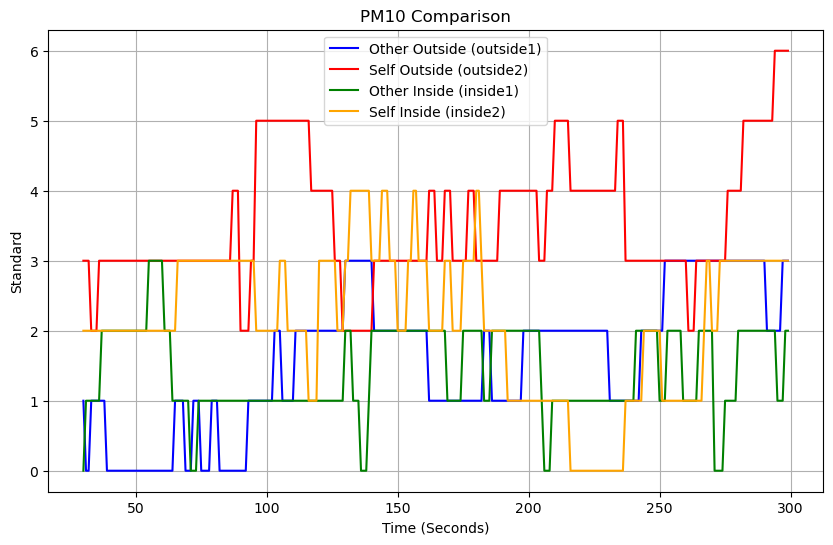

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outside1 = pd.read_csv('outsidedata.csv', skiprows=0)

outside2 = pd.read_csv('SensorsOutside.csv', skiprows=1)

time_outside1 = np.arange(30, len(outside1))  
data_outside1 = outside1.iloc[30:, 3]  
time_outside2 = np.arange(30, len(outside2))  
data_outside2 = outside2.iloc[30:, 8]  
inside1 = pd.read_csv('insidedata.csv', skiprows=0)

inside2 = pd.read_csv('SensorsInside.csv', skiprows=1)

time_inside1 = np.arange(30, len(inside1))  
data_inside1 = inside1.iloc[30:, 3]  
time_inside2 = np.arange(30, len(inside2))  
data_inside2 = inside2.iloc[30:, 8]  

inside = pd.read_csv('SensorsInside.csv', skiprows=1)
time_inside = np.arange(30, len(inside))  
data_inside = inside.iloc[30:, 1]  

min_length = min(len(data_outside1), len(data_outside2), len(data_inside1), len(data_inside2), len(data_inside))

time_outside1 = time_outside1[:min_length]
time_outside2 = time_outside2[:min_length]
time_inside1 = time_inside1[:min_length]
time_inside2 = time_inside2[:min_length]
time_inside = time_inside[:min_length]

data_outside1 = data_outside1[:min_length]
data_outside2 = data_outside2[:min_length]
data_inside1 = data_inside1[:min_length]
data_inside2 = data_inside2[:min_length]
data_inside = data_inside[:min_length]

plt.figure(figsize=(10, 6))

plt.plot(time_outside1, data_outside1, label='Other Outside (outside1)', color='blue')
plt.plot(time_outside2, data_outside2, label='Self Outside (outside2)', color='red')

plt.plot(time_inside1, data_inside1, label='Other Inside (inside1)', color='green')
plt.plot(time_inside2, data_inside2, label='Self Inside (inside2)', color='orange')

plt.xlabel('Time (Seconds)')
plt.ylabel('Standard')
plt.title('PM10 Comparison')

plt.legend()
plt.grid(True)

plt.show()


Examining all the graphs, it seems that our sensors are similar in their data readinds, but our own outside measurements seems to be off. This could be due to the time it took to get upstairs and outside. We removed the first 30 seconds of all the data to see if we could eliminate some of that human error but it seems like it wasn't enough.  